In [3]:
from networks import *
from simulation import *
from display import *
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

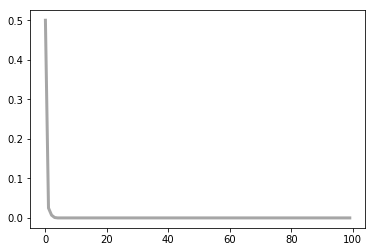

In [4]:
g = gen_ER_graph(1000, 6 / (1000 - 1))
data = run_SIS_simulation(g, .05, time_steps=100)
plot_all_time_steps(data)

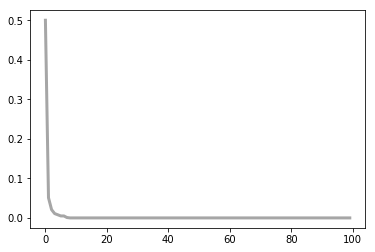

In [5]:
g = gen_ER_graph(1000, 6 / (1000 - 1))
data = run_SIS_simulation(g, .10, time_steps=100)
plot_all_time_steps(data)

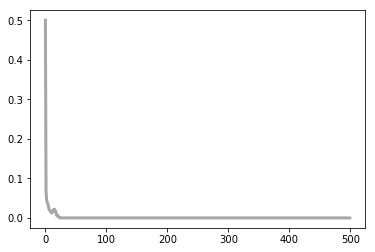

In [6]:
g = gen_ER_graph(1000, 6 / (1000 - 1))
data = run_SIS_simulation(g, .15, time_steps=500)
plot_all_time_steps(data)

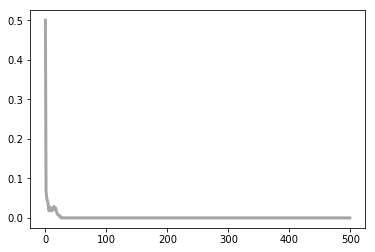

In [7]:
g = gen_ER_graph(1000, 6 / (1000 - 1))
data = run_SIS_simulation(g, .16, time_steps=500)
plot_all_time_steps(data)

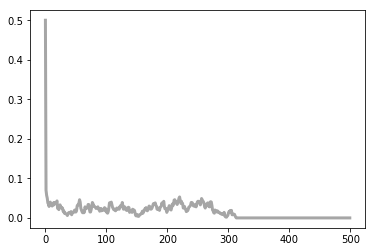

In [8]:
g = gen_ER_graph(1000, 6 / (1000 - 1))
data = run_SIS_simulation(g, .17, time_steps=500)
plot_all_time_steps(data)

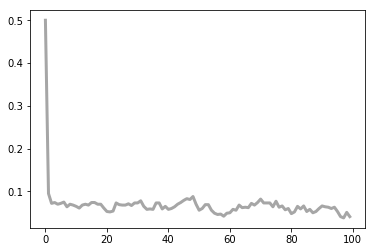

In [9]:
g = gen_ER_graph(1000, 6 / (1000 - 1))
data = run_SIS_simulation(g, .20, time_steps=100)
plot_all_time_steps(data)

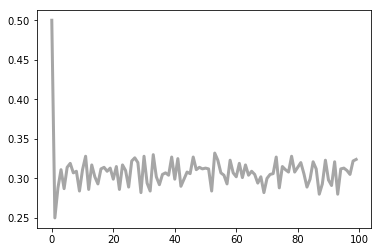

In [97]:
g = gen_WS_graph(1000, 6, 0.5)
data = run_SIS_simulation(g, 0.5, time_steps=100)
plot_all_time_steps(data)

In [2]:
data = {}
lambdas_plan = {
    1e5 : np.linspace(1/12, 1/8, 5),
    5e5 : np.linspace(1/15, 1/10, 3),
    1e6 : np.linspace(1/17, 1/12, 2),
    5e6 : np.linspace(1/18, 1/15, 2),
    8.5e6 : np.linspace(1/20, 1/19, 2),
#     8.5e4 : [1/20]
}

graphs = {}
for size in lambdas_plan.keys():
    print('starting size: ', size)
    g = nx.erdos_renyi_graph(int(size),  6 / (size - 1))
    graphs[size] = g


starting size:  100000.0


KeyboardInterrupt: 

In [3]:
import pickle
    
# pickle.dump(graphs, open('ER_2.pickle', 'wb'))

In [10]:
import pickle
graphs = pickle.load(open('ER.pickle', 'rb'))

In [12]:
for size in lambdas_plan.keys():
    for lam in lambdas_plan[size]:
        print('\tstarting lamda: ', lam)
        data[(size, lam)] = []
        for trial in range(10):
            print('t', trial)
            data[(size, lam)].append(run_SIS_simulation(graphs[size], lam, time_steps=20)[-1])
        data[(size, lam)] = np.mean(data[(size, lam)])

	starting lamda:  0.0833333333333


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

/home/slyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


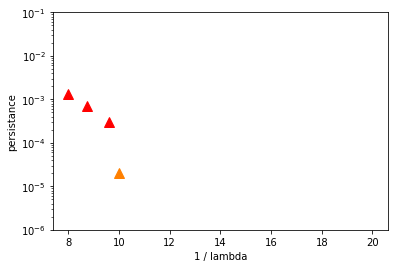

In [13]:
plottable_data = {}
for size, lam in data:
    plottable_data[size] = plottable_data.get(size, []) + [(1.0/lam, data[(size, lam)])]
    
# plot a fit
all_xs = []
all_ys = []
for values in plottable_data.values():
    xs, ys = zip(*values)
    all_xs.extend(xs)
    all_ys.extend(ys)
    
a, c = np.polyfit(all_xs, np.log(all_ys), 1)
fit_xs = np.linspace(8, 20, 100)
fit_ys = np.exp(a * fit_xs + c)
thinkplot.plot(fit_xs, fit_ys, style='--', linewidth=1, color=(.4,.4,.4), alpha=1.0)


# plot a 
shapes = ['o', '+', 's', 'x', 'v', '.']
colors = [(1., 0., 0.), (1., .5, 0.), (.5, 1., 0.), (0., 1., 0.), (0., .9, .9)]

for size, shape, color in zip(plottable_data, shapes, colors):
    xs, ys = zip(*plottable_data[size])
    thinkplot.plot(xs, ys, style='^', color=color, markersize=10, alpha=1.0)
    

thinkplot.config(ylim=[1e-6, 1e-1], yscale='log', xlabel='1 / lambda', ylabel='prevalance')
